In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. N*Mサイズを指定する。

In [2]:
random_flag = False

if random_flag:
    # ランダム版
    n = random.randint(1, 10)
    m = random.randint(1, 10)
else:
    n = 3
    m = 3
    
print(n, m)

3 3


## 2. 初期の盤面を決定

In [12]:
init_state = random.sample(range(n*m), k=random.randint(1,n*m))
bord_state = np.array([True if i in init_state else False for i in range(n*m)])

print(sorted(init_state))
print(bord_state)

[3, 7]
[False False False  True False False False  True False]


## 3. 状態の表示

In [48]:
def display_state(n, m, states, color='blue'):
    # config
    plt.figure(figsize=(n,m))
    plt.xlim(0,n)
    plt.ylim(0,m)
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                    labelbottom=False, right=False, left=False, labelleft=False)

    # grid
    plt.plot([1, 1], [0, 3], color='gray', linewidth=0.5)
    plt.plot([2, 2], [0, 3], color='gray', linewidth=0.5)
    plt.plot([0, 3], [1, 1], color='gray', linewidth=0.5)
    plt.plot([0, 3], [2, 2], color='gray', linewidth=0.5)

    # plot ON-OFF state
    for i, state in enumerate(states):
        if state:
            plt.fill_between((i%n, i%n+1), m-i//m-1, m-i//m, facecolor=color)

    plt.show()

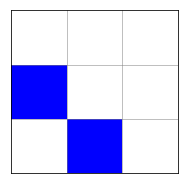

In [49]:
display_state(n, m, bord_state)

## 4. solver

### 4.1 各所を押下時の挙動を列挙

In [44]:
push_state = []
for i in range(n):
    for j in range(m):
        tmp = np.array([[False]*n]*m)
        tmp[i, j] = True
        for k in [i-1, i+1]:
            if 0 <= k < n:
                tmp[k, j] = True
        for k in [j-1, j+1]:
            if 0 <= k < m:
                tmp[i, k] = True
        push_state.append(tmp.reshape(-1))

push_state = np.array(push_state)
print(push_state)

[[ True  True False  True False False False False False]
 [ True  True  True False  True False False False False]
 [False  True  True False False  True False False False]
 [ True False False  True  True False  True False False]
 [False  True False  True  True  True False  True False]
 [False False  True False  True  True False False  True]
 [False False False  True False False  True  True False]
 [False False False False  True False  True  True  True]
 [False False False False False  True False  True  True]]


#### 一覧表示

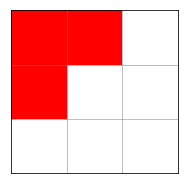

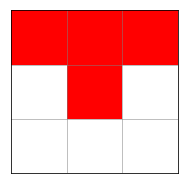

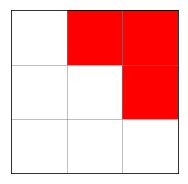

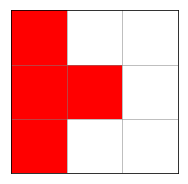

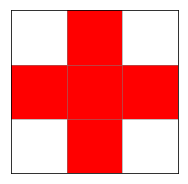

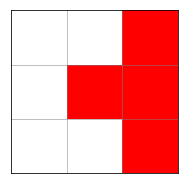

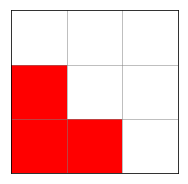

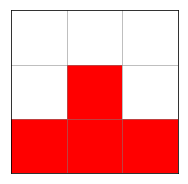

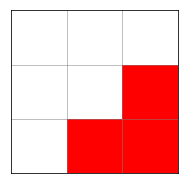

In [47]:
for p_state in push_state:
    display_state(n, m, p_state, 'red')

### 4.2 方程式を作成